In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Veri seti reklam harcamalarını konu alan bir veri seti.
#Tv, radyo ve gazeteye verilen reklamlar ile kazanılan satış değerleri verilmiş.
#Veri setini ekleyip bozulmasın diye kopyasını alıyoruz.
data=pd.read_csv("Advertising.csv")
df=data.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Veri seti indexi değişken olarak almış.Fazlalık indexi kaldırıyoruz.
df=df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#Veri setine hızlıca bir göz atalım.
#Veri setinde 200 gözlem, 4 değişken var. Değişken tipleri float yani bütün değişkenler sürekli değişken.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
#Veri setinin betimsel istatistiklerine bakalım.
df.describe().T
#Eksik veri olmadığını görüyoruz. Değişkenlerin ortalamalarını,en düşük-en yüksek değerlerini ve  dağılımlarını görüyoruz.

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.shape

(200, 4)

In [7]:
#Korelasyon hesaplayarak veri setindeki değişkenlerin birbirleri arasındaki ilişkiye ve 
#hangi değişkenin sonucu ne kadar etkilediğine bakalım.
df.corr()
#Tv değişkeninin sonuca etkisinin yüksek olduğunu görüyoruz.
#Değişkenlerin kendi aralarında ilişki yok gibi görünüyor.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


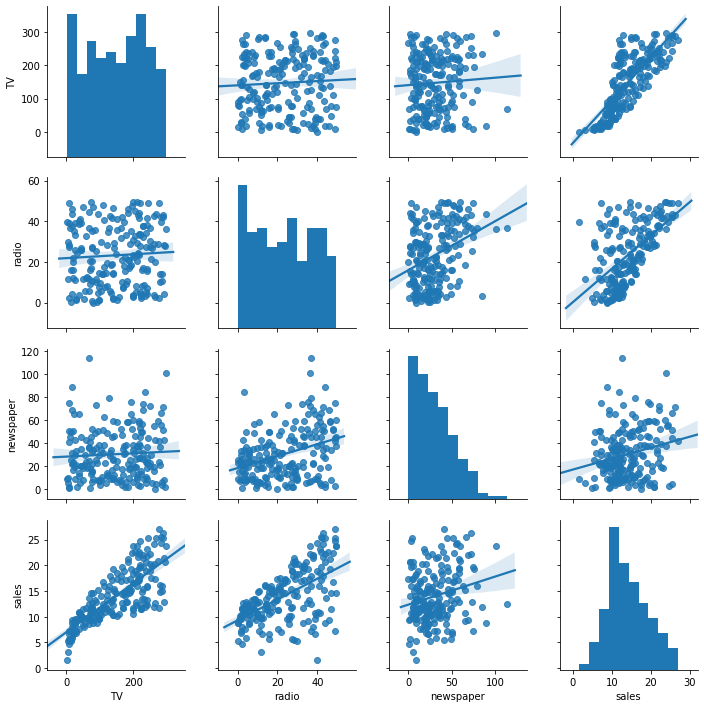

In [8]:
#Daha kolay görülmesi açısından değişken ilişkilerine grafikler yardımıyla bakalım.
sns.pairplot(df,kind="reg");
#Tv ve radyo değişkeninin çıktıya etkisi gözle görülebilecek şekilde.
#Köşegende bulunan grafikler değişkenlerin kendi içersindeki dağılımı gösteriyor.

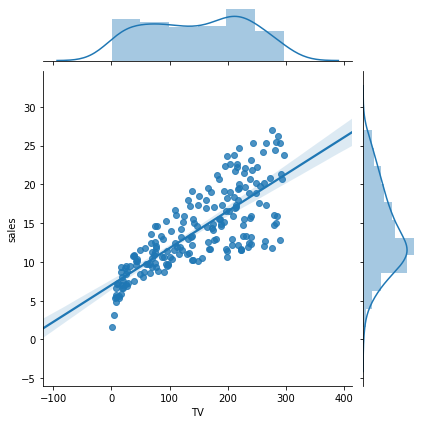

In [9]:
#Tv değişkeninin etkisine ve dağılımına ayrıca bakalım.
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

In [10]:
#Doğrusal regresyon kullanacağımız için tek değişken kullanılacak. Tv değişkenini kullanmayı seçiyoruz.
#Doğrusal regresyon formülünde bir sabit ve bir değişken olduğu için Tv değişkenini veri setinden ayırıp bir sabir ekliyoruz.
x=df[["TV"]]
x=sm.add_constant(x)
x[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [11]:
#Çıktı değişkenimizi de veri setinden ayıralım.
y=df[["sales"]]
y[:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [12]:
#Statsmodels kütüphanesini kullanarak regresyon modelimizi kuralım.
lm=sm.OLS(y,x)
model=lm.fit()

In [13]:
#OLS fonksiyonunu kullandığımız için modelin istatistiksel detaylarına kolayca ulaşabiliyoruz.
model.summary()
#Bu çıktıda modeli(OLS), kullandığı methodu(En küçük kareler), r2 değerini, düzeltilmiş r2 değerini, f istatistiğini vs. görebiliriz.
#R2 değeri, kullandığımız değişkenin çıktıyı açıklama oranıdır. 
#Tv değişkeni çıktının %61'ini açıklayabilmiş.
#R2 ve düzeltilmiş r2 arasındaki fark ise r2 nin değişken sayısı arttıkça yükselmesidir.
#Düzeltilmiş r2 eklenen değişkenlerin anlamlılığına da bakar ve daha düzgün sonuç verir.
#2. tabloda modelin kurduğu regresyon formülünün katsayılarını, anlamlılığını ve katsayıların güven aralığını görüyoruz.
#Sabit 7.03,tv etkisi olmadığında satışlardan beklenen değerdir.
#Tv katsayısı 0.047, bir birimlik tv harcamasında satışın etkileneceği miktardır.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        19:49:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Katsayıları ayrıca görebiliriz.
model.params

const    7.032594
TV       0.047537
dtype: float64

In [15]:
#Katsayıların belirlendiği aralığı görebiliriz.
#Katsayılar bu aralığın ortalaması olarak belirlenir.
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [16]:
#Modelin oluşturduğu denklemini yazdıralım.
print("Sales = "+("%.3f"%model.params[0])+" + "+" TV * "+("%.3f"%model.params[1]))

Sales = 7.033 +  TV * 0.048


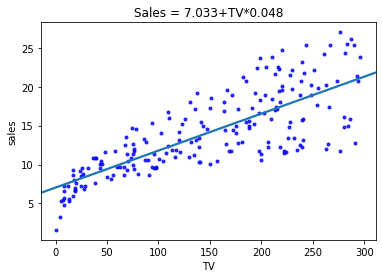

In [17]:
#Veri setini grafiğe dökerek oluşturduğumuz regresyon doğrusunu çizdirelim.
sns.regplot(x="TV",
            y="sales",
            data=df,
            ci=None,
            scatter_kws={"color":"b","s":9}).set_title("Sales = "+
                                                       str("%.3f"%model.params[0])+
                                                        "+"+"TV*"+str("%.3f"%model.params[1]));

In [18]:
#Kurduğumuz model ile tahminde bulunalım.
model.predict(x)[:5]
#Çıktı değişkenini tekrardan modele tahmin ettirdik.
#Sonuçlar yakın gibi ama tek değişken kullandığımız için yeteri kadar iyi olmayabilir.

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

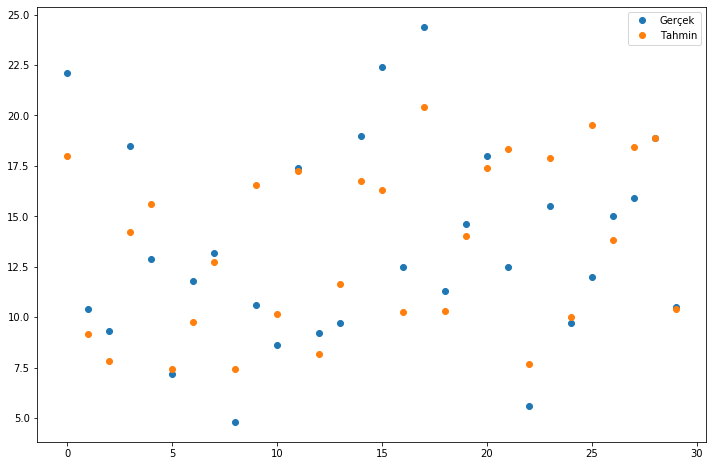

In [19]:
plt.figure(figsize=(12,8))
plt.plot(y[:30],"o")
plt.plot(model.predict(x)[:30],"o")
plt.legend(["Gerçek","Tahmin"]);
#Asıl çıktıları ve tahminleri grafikte daha net olarak görelim.
#Her bir gözlem için dikey olarak gerçek değer ve tahmin değeri gösterdik.

In [20]:
#Regresyon modelini bir de sklearn kütüphanesini kullanarak kuralım.
lm2=LinearRegression()
x=df[["TV"]]
model2=lm2.fit(x,y)

In [21]:
print("Sabit: ",model2.intercept_," Tv katsayısı: ",model2.coef_)

Sabit:  [7.03259355]  Tv katsayısı:  [[0.04753664]]


In [22]:
y_pred=model2.predict(x)

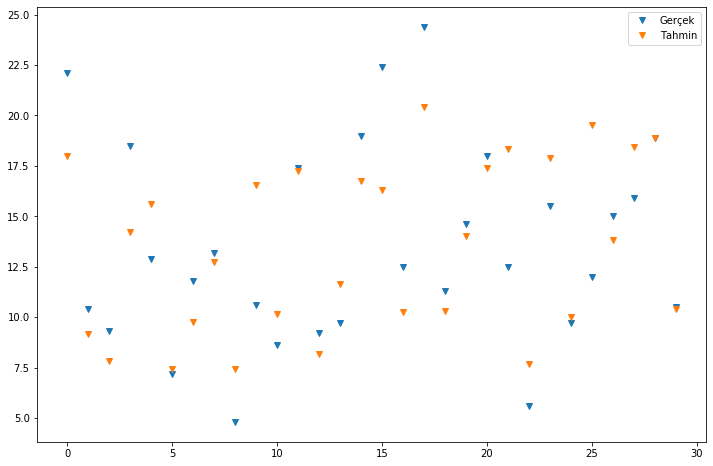

In [23]:
plt.figure(figsize=(12,8))
plt.plot(y[:30],"v")
plt.plot(model2.predict(x)[:30],"v")
plt.legend(["Gerçek","Tahmin"]);
#Yeni kurduğumuz modelin tahminlerini grafikte bakalım.
#Sadece yöntem değiştirdiğimiz için sonuçlar aynı olacak.

In [24]:
#Modelimizin denklemi: Sales = 7.033+TV*0.048
#Bu denklemi kullanarak el ile bir tahmin yapalım.
7.033 + 50 * 0.048
#Tv harcamalarında 50 birimlik bir değişim ile çıktı bu şekilde oluyor. 

9.433

In [25]:
#Değeri vererek fonksiyon ile modele tahmin ettirebiliriz.
model2.predict([[30]])

array([[8.45869276]])

In [26]:
tv_verileri=[[40],[80],[120]]
model2.predict(tv_verileri)

array([[ 8.93405917],
       [10.83552478],
       [12.7369904 ]])